In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from keras.utils import to_categorical
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [2]:
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
d:\Extra\pyDev\.pyDev\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
d:\Extra\pyDev\.pyDev\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

In [3]:
print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Categories: [0 1]
Number of unique words: 9998
Average Review length: 234.75892
Standard Deviation: 173


In [4]:
print("Label:", targets[0])
print(data[0])

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
index = imdb.get_word_index()
print(index['good'])
reverse_index = dict([(value, key) for (key, value) in index.items()])
print(reverse_index[49])
print(reverse_index[14-3])
print([i for i in data[0]])
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded)

49
good
this
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
# this film was just brilliant casting location

In [6]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results 

print(type(data))
data = vectorize(data)
targets = np.array(targets).astype("float16")

<class 'numpy.ndarray'>


In [7]:
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]

In [8]:
model = Sequential([
    Dense(64, activation = "relu", input_shape=(10000, )),
    Dropout(.4),
    Dense(64, activation = "relu"),
    Dropout(.2),
    Dense(32, activation = "relu"),
    Dropout(.1),
    Dense(1, activation = "sigmoid")])
# model.save('model.h5')

In [9]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
results = model.fit(train_x, train_y, epochs=2, batch_size=500, validation_data = (test_x, test_y))
print(np.mean(results.history["val_accuracy"]))

Epoch 1/2
80/80 [==============================] - 39s 153ms/step - loss: 0.5208 - accuracy: 0.7341 - val_loss: 0.2601 - val_accuracy: 0.8955
Epoch 2/2
80/80 [==============================] - 2s 30ms/step - loss: 0.2213 - accuracy: 0.9158 - val_loss: 0.2746 - val_accuracy: 0.8922
0.8938499987125397


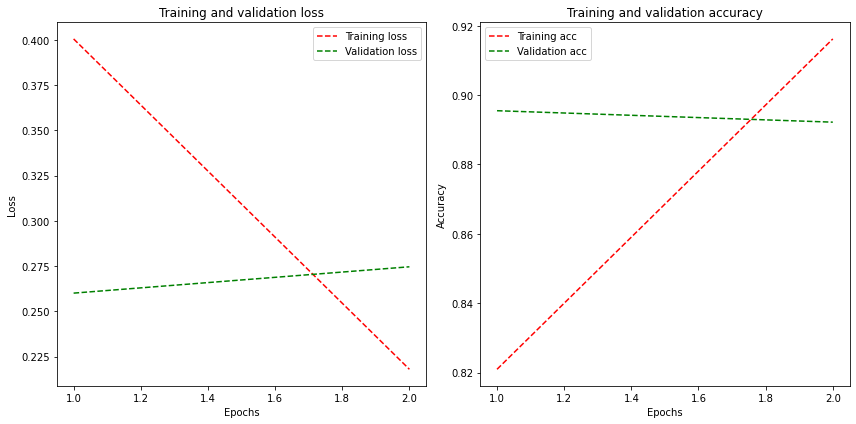

In [10]:
def draws(H): 
    loss = H.history['loss']
    val_loss = H.history['val_loss']
    acc = H.history['accuracy']
    val_acc = H.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 3])
    plt.subplot(gs[0])
    plt.plot(epochs, loss, 'r--', label='Training loss')
    plt.plot(epochs, val_loss, 'g--', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(gs[1])
    plt.plot(epochs, acc, 'r--', label='Training acc')
    plt.plot(epochs, val_acc, 'g--', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

draws(results)

In [27]:
def load_text():
    dictionary = imdb.get_word_index()
    load_x = []

    words = input()
    words = re.sub(r"[^a-zA-Z0-9']", " ", words)
    words = words.split(' ')
    print(words)

    valid = []
    for word in words:
        word = dictionary.get(word) # в число
        if word in range(1, 10000):
            valid.append(word+3)
    load_x.append(valid)

    print(load_x)
    load_x = vectorize(load_x)
    result = model.predict(load_x)
    print(result)

load_text()    

['very', 'bad', 'film', 'worst']
[[55, 78, 22, 249]]
[[0.11152748]]
